<a href="https://colab.research.google.com/github/mdkamrulhasan/gvsu_machine_learning/blob/main/notebooks/winter-2025/Assignment_1_solution_678.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
import plotly.express as px
import itertools
import scipy.stats as stats

## Problem 1

For each dimension d ∈ [2^1, 2^3, 2^5, ..., 2^11], sample 100 random points from corresponding vector
spaces (sample code to generate random samples is provided below), and

• Record the l2 and the cosine distances between all pairs (of points); then

• Fit two normal/Gaussian distributions, one for each distance metric. Share the mean (μ) and the standard distribution (σ) parameters of each distribution that you have learned.

• Plot these normal/Gaussian distributions using your preferred visualization package(s).



Sample code (to generate n = 100 random samples from a d = 4 dimensional vector space):


---



import numpy as np

d, n = 4, 100

sample data = np.random.randn(n, d)

## Solution

**Helper function definitions**

In [3]:
NB_STEPS = 1000
W_STD = 4
NB_DATA_POINTS = 100

np.random.seed(42)

def plot_graph(_mean, _std, distance_type):
  x_axis = np.arange(_mean - 4*_std, _mean + W_STD*_std, W_STD*_std/NB_STEPS)
  plt.plot(x_axis, norm.pdf(x_axis, _mean, _std))
  plt.title(distance_type)
  plt.show()

def find_distances_distribution(pairs, distance_type, remove_mean):
  if distance_type == 'l1':
    pair_distances = [np.sum(np.abs(px[0] - px[1])) for px in pairs]
  elif distance_type == 'l2':
    pair_distances = [np.linalg.norm(px[0] - px[1]) for px in pairs]
  elif distance_type == 'cosine':
    pair_distances = [1 - np.dot(px[0], px[1]) / (np.linalg.norm(px[0]) * np.linalg.norm(px[1])) for px in pairs]
  else:
    raise ValueError('Invalid distance type')


  if remove_mean:
    pair_distances = (pair_distances - np.mean(pair_distances)) # / np.std(pair_distances)

  _mean, _std = np.round(np.mean(pair_distances),2), np.round(np.std(pair_distances), 2)

  return _mean, _std, pair_distances


def generate_and_analyze_data(distance_type, remove_mean=False):

  # Plot the distributions
  plt.figure(figsize=(12, 8))

  for i in np.arange(1, 12, 2):
    d = 2**i
    data = np.random.randn(NB_DATA_POINTS, d)
    pairs = list(itertools.combinations(data, 2))

    _mean, _std, _ = find_distances_distribution(pairs, distance_type, remove_mean)

    x = np.linspace(_mean - 3*_std, _mean + 3*_std, 100)
    plt.plot(x, stats.norm.pdf(x, _mean, _std),
             label=f'd={d}, mu={_mean}, std={_std}')


  plt.title(f'Gaussian Fit for {distance_type} Distance')
  plt.xlabel('Distance')
  plt.ylabel('Density')
  plt.legend()


#generate_and_analyze_data('l1')

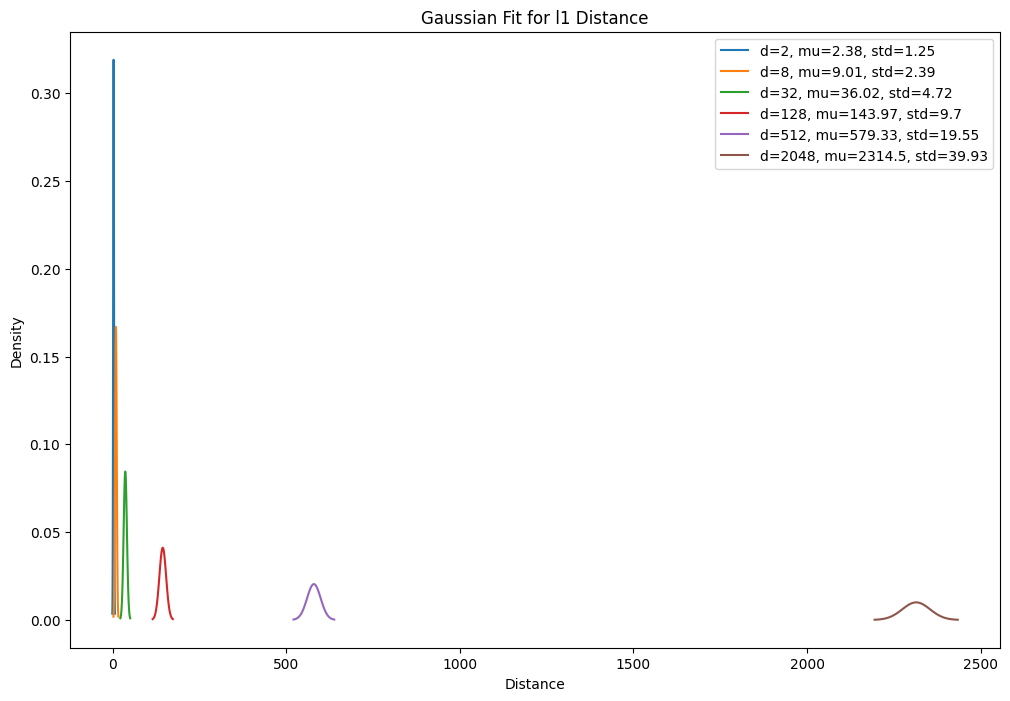

In [21]:
generate_and_analyze_data('l1')

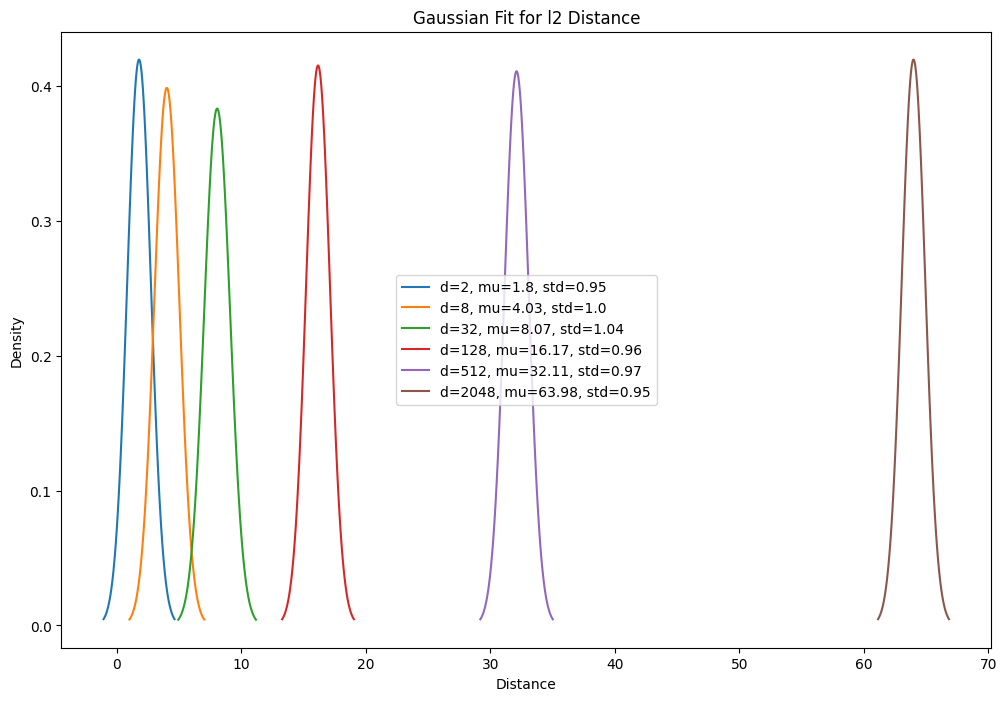

In [22]:
generate_and_analyze_data('l2')

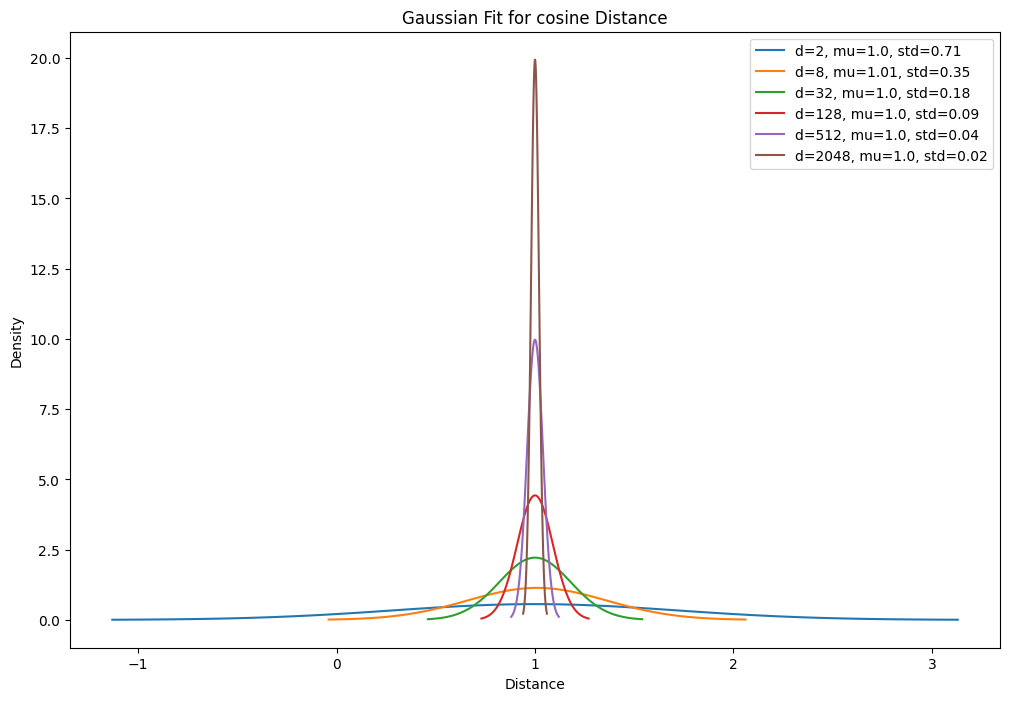

In [23]:
generate_and_analyze_data('cosine')

Distance analysis in the 'cosine' space

## Problem 2

There are some orange and green balls in a red and a blue box as illustrated in Figure 1. Someone (blinded by tying a piece of cloth around his/her eyes) is asked to pick up a ball twice (with replacement, i.e. the ball is placed back in the same box from where it was picked up).

(a) What is the log-probability of the first ball to be orange and second ball to be green?
(b) What is is probability that both the time the ball came from the red box?

Note: We assume, the selection of the red and the blue boxes follow an uniform distribution (given that the person is not able to see the color of those boxes).

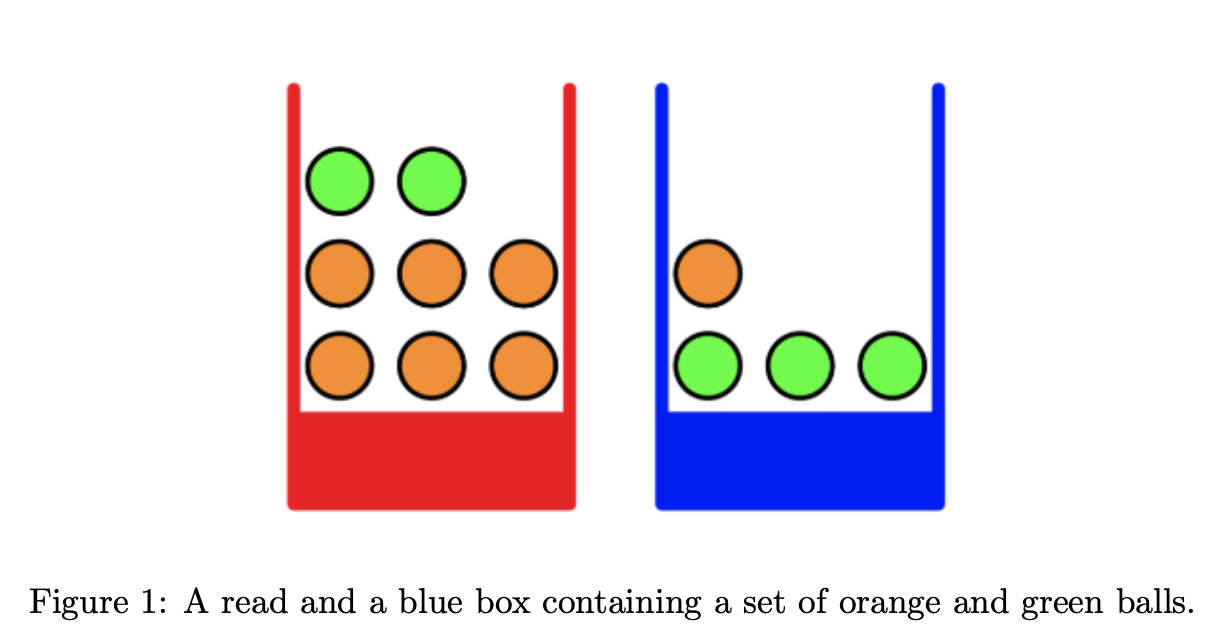

## Solution

2(a) log-probability of the first ball to be Orange (O) and the second ball to be Green (G)

## We accepted two soulutons:

2.a.1 Using a single distribution
- Assuming, the person don't know the context as the his/her eyes are blinded through tying a piece of cloth around his/her eyes.

In [7]:
# a1.1) log-probability of the first ball to be Orange (O) and the second ball to be Green (G)
np.log(7/12*5/12)

-1.4144652380865868

2.a.2 Using two conditional distributions (Orthodox Bayesian setting)

In [8]:
#p(Ball=Orange) = p(Ball=Orange|Box=R)*p(Box=Red) + p(Ball=Orange|Box=Blue)*p(Box=Blue)
P_O = (6/8)*(1/2) + (1/4)*(1/2)
#p(Ball=Green) = p(Ball=Green|Box=R)*p(Box=Red) + p(Ball=G|Box=Blue)*p(Box=Blue)
P_G = (2/8)*(1/2) + (3/4)*(1/2)
# final answer
log_P_O_G = np.log(P_O) + np.log(P_G)
log_P_O_G

-1.3862943611198906

2(b) Both the time the ball came from the red box
## p(Box=R|Ball=Orange)*p(Box=R|Ball=Green)

In [10]:
# p(Box=R|Ball=Orange) = p(Box=R, Orange)/p(Ball=Orange)
#            = p((Ball=Orange|Box=R)*p(Box=R))/P(Ball=Orange) --- (1)

p_R_given_O = ((6/8)*(1/2))/((6/8)*(1/2) + (1/4)*(1/2))


# p(Box=R|Ball=Green) = p(Box=R, Green)/p(Ball=Green)
#            = p((Ball=Green|Box=R)*p(Box=R))/P(Ball=Green) --- (2)

p_R_given_G = ((2/8)*(1/2))/((2/8)*(1/2) + (3/4)*(1/2))

# now we multiply (1) and (2) to get the desired solution
p_both_from_red = p_R_given_O * p_R_given_G
p_both_from_red

0.1875

The following submission is graded partially (as we received a number of submissions). The sloution given above is the right solution.

## Two balls (irrespective of their colors) from the Red box. In other way, we are estimating the probability of choosing the red box twice.

p(Box=Red) * p(Box=Red)

In [ ]:
1/2 * 1/2

0.25

Partial scores

## Problem 3

Given a Linear Regression model, Θ = {β0 = 0.1, β1 = 0.9, β2 = −3.5} (where β0 is the bias and β1 and β2 are the parameters associated with two input features/variables), the regularizer parameter λ = 1.5 and the following data set (with y being the target variable), estimate the Quadratic error or loss with l2 regularizer as defined below

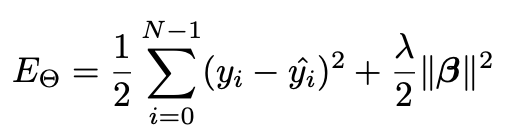

## Solution

In [12]:
BETA_0, BETA_1, BETA_2 = 0.1, 0.9, -3.5
LAMBDA = 1.5

In [13]:
q3_data = "https://raw.githubusercontent.com/mdkamrulhasan/data-public/refs/heads/main/miscellaneous/linear_regression_2d_data.csv"
pd3 = pd.read_csv(q3_data)

In [14]:
pd3.head(2)

,x_0,x_1,y
0,-0.086861,0.304275,1.953738
1,1.490889,-0.341033,3.186881


In [17]:
error_v = pd3['y'] - (BETA_0 + BETA_1*pd3['x_0'] + BETA_2*pd3['x_1'])
error = 0.5*(error_v)*np.sum(error_v**2) + LAMBDA/2*np.sum(
    (BETA_0**2 + BETA_1**2 + BETA_2**2))
#error

## Problem 4

You are asked to fit a second order/degree polynomial regression model, y = β0 + β1x + β2x2 with parameter Θ = {β0, β1, β2} (where β0 is the bias of your model) on the following dataset.

data file:
  https://raw.githubusercontent.com/mdkamrulhasan/data-public/refs/heads/main/miscellaneous/second_degree_polynomial_regression_data.csv

For the setup below, we ask you to find out the updated version of Θ after two(2) iterations of any gradient descent algorithm (you can use the algorithm that we shared as a part of our linear regression model illustration in the class):

**Setup details:**

• Use the quadratic error/loss function
• Initialize, Θ0 = {β0 = 0.0, β1 = 0.0, β2 = 1.0}
• Use learning rate (parameter), L = 0.001

Note: You have to define your error/loss function and also will need to estimate partial derivatives of your loss function.

## Solution

In [18]:
dataset_two = pd.read_csv("https://raw.githubusercontent.com/mdkamrulhasan/data-public/refs/heads/main/miscellaneous/second_degree_polynomial_regression_data.csv")
dataset_two.head()

,x,y
0,1.478539,-10.538550
1,-0.814065,-2.124750
2,-0.121143,-1.992647
3,1.102154,-8.285820
4,1.562379,-11.587399


In [19]:
x = dataset_two.x.values
y = dataset_two.y.values

In [20]:
beta_0, beta_1, beta_2 = beta_init = [0.0,0.0,1]
learning_rate = 0.001
epochs = 2
n = float(len(x))


for i in range(epochs):

    y_hat = beta_0 + beta_1*x + beta_2*x**2

    beta_0 = beta_0 - learning_rate * (2/n) * sum((y_hat - y))
    beta_1 = beta_1 - learning_rate * (2/n) * sum((y_hat - y) * x)
    beta_2 = beta_2 - learning_rate * (2/n) * sum((y_hat - y ) * x**2)



    print(np.sum((y_hat - y)**2))
    # print(beta_0, beta_1, beta_2)

betas = [beta_0,beta_1,beta_2]

print([round(beta, 4) for beta in betas])

4589.695163775927
4542.923075699465
[-0.0216, -0.0051, 0.963]


## Problem 5

For the given dataset below, we ask you develop, test and compare following models (follow the instructions under the Detailed specification section below).

(a) Linear Regression

(b) Linear Regression with l1 regularizer

(c) Linear Regession with l2 regularizer

data file:

https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/medical-cost/insurance.csv


**Detailed specification:**

• Use a 50%-50% test/train setup.

• Use Mean Squared Error (MSE) as your evaluation metric.

• Visualize (using Bar charts) the model parameter absolute values (covert any negative values to positives before plotting).

• You can use python packages such as sklearn for your solution.

## Solution

https://github.com/mdkamrulhasan/machine_learning_concepts/blob/master/notebooks/supervised/Regression_diabetes_LR_Regularization.ipynb